# Prosper Loan Data Wrangling

### by Magon Bowling

## Preliminary Wrangling
The Prosper Loan Data was made available for download by Udacity in the course resources.  The file was manually downloaded and then uploaded to Jupyter Notebook for wrangling and analysis.  The dataset contains information regarding over 100,000 loans.

In [2]:
# Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Load the .csv file containing the prosper loan data
df = pd.read_csv('prosperLoanData.csv')

In [4]:
# Get an overview of the dataset and structure
df.shape

(113937, 81)

In [5]:
# First five rows of the dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of the dataset?

The loan dataset contains 113,937 rows and 81 variable columns.  The loan information provides rates, status, term length, number of lenders and more.  We will explore all the necessary information in the dataset by assessing the data, cleaning the data for visualization, and then creating appropriate visuals to illustration the information gathered.  

In [6]:
# Summary of the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What are the main features of interest in your dataset?

I am interested in the income of individuals with loans and how they are able to handle their loan payments.  I want to explore logistics of a loan that affect the amount disbursed.  I will explore the following 13 variables and look for reasons as to why loans are issued to individuals with specific incomes.  Maybe I can understand how individuals are able to handle loans based on their income and living demographics.  I will create a copy of the dataframe for use in my exploration. 

* Term
* ListingCategory
* BorrowerState
* EmploymentStatus
* EmploymentStatusDuration
* IsBorrowerHomeowner
* CreditScoreReportLower
* CreditScoreReportUpper
* DebtToIncomeRatio
* IncomeRange
* StatedMonthlyIncome
* LoanOriginalAmount
* MonthlyLoanPayment

### What features in the dataset do you think will help support your investigation into your features of interest?

I believe that a look at the value counts for term, listing category, borrower state, employment status, credit score range, and income range will give me a good sense as to who is deserving of such loans.  I will explore relationships such as: loan amounts to debt ratio, income range to credit score range, credit score range to loan amounts, debt ratio to monthly loan payments, and loan amounts to listing category.  I suspect that those with higher credit scores, higher incomes, and longer employment status will have the best debt to income ratio.  

## Assessing the Data

To begin the wrangling process, I will make a copy of the dataframe that will include the 15 columns listed above.  Next I will check for quality and tidiness issues to better prepare for visualization and analysis.  After I clean the data, I will explore the data through visualizations and explain the findings within those visualizations.  Let's get started!

In [7]:
# Create a sub-dataset from Prosper loan data which contains only the 15 stated variables
df_clean = df.copy()
df_clean = df_clean.iloc[:, np.r_[4, 16, 17, 19, 20, 21, 25, 26, 46, 47, 49, 63, 67]]

In [8]:
# View summary of sub-dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   BorrowerState              108422 non-null  object 
 3   EmploymentStatus           111682 non-null  object 
 4   EmploymentStatusDuration   106312 non-null  float64
 5   IsBorrowerHomeowner        113937 non-null  bool   
 6   CreditScoreRangeLower      113346 non-null  float64
 7   CreditScoreRangeUpper      113346 non-null  float64
 8   DebtToIncomeRatio          105383 non-null  float64
 9   IncomeRange                113937 non-null  object 
 10  StatedMonthlyIncome        113937 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  MonthlyLoanPayment         113937 non-null  float64
dtypes: bool(1), float64(6), int64

In [9]:
# Check for uniqueness
df_clean.nunique()

Term                             3
ListingCategory (numeric)       21
BorrowerState                   51
EmploymentStatus                 8
EmploymentStatusDuration       605
IsBorrowerHomeowner              2
CreditScoreRangeLower           26
CreditScoreRangeUpper           26
DebtToIncomeRatio             1207
IncomeRange                      8
StatedMonthlyIncome          13502
LoanOriginalAmount            2468
MonthlyLoanPayment           23567
dtype: int64

In [10]:
# Assess more information about variables
df_clean.describe()

,Term,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113937.000000,106312.000000,113346.000000,113346.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,2.774209,96.071582,685.567731,704.567731,0.275947,5.608026e+03,8337.01385,272.475783
std,10.436212,3.996797,94.480605,66.458275,66.458275,0.551759,7.478497e+03,6245.80058,192.697812
min,12.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,36.000000,1.000000,26.000000,660.000000,679.000000,0.140000,3.200333e+03,4000.00000,131.620000
50%,36.000000,1.000000,67.000000,680.000000,699.000000,0.220000,4.666667e+03,6500.00000,217.740000
75%,36.000000,3.000000,137.000000,720.000000,739.000000,0.320000,6.825000e+03,12000.00000,371.580000
max,60.000000,20.000000,755.000000,880.000000,899.000000,10.010000,1.750003e+06,35000.00000,2251.510000


In [11]:
df_clean.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [12]:
df_clean['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [13]:
df_clean['BorrowerState'].unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

In [14]:
df_clean['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

In [15]:
df_clean['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [16]:
df_clean['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [17]:
sum(df_clean.duplicated())

874

## Cleaning the Data

**Quality Issues:**
1. Name of the column `ListingCategory (numeric)` includes a space.
2. Data type of the `Term` column is integer, not ordinal categorical variable.
3. Data type of the `ListingCategory (numeric)` column is integer, not nominal categorical variable.
4. The `EmploymentStatus` column includes two categories which may indicate the same status of employment: Not available and NaN.
5. There are 871 duplicate rows of data in the df_clean dataframe.
6. 11 of the 16 features in the dataframe object df_clean include multiple NaN values.
7. Data types for columns `EmploymentStatusDuration`, `CreditScoreRangeLower`, and `CreditScoreRangeUpper` are floats, not integers.
8. Values under the `StatedMonthlyIncome` column have more than two digits after the decimal although the column represents a monetary amount.
9. Data type of the `LoanOriginalAmount` column, which represents a monetary amount, is an integer, not float. 

**Tidiness Issue:**
1. Range of each borrower's credit score is split into two columns for lower and upper boundaries, instead of a range.

### Quality Issue 1
*The name for column `ListingCategory (numeric)` includes a space.*

**Define:** Change the name of the column to `ListingCategory`.

**Code**

In [18]:
# Change column name
df_clean.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace=True)

**Test**

In [19]:
# Confirm the change in name
df_clean.columns

Index(['Term', 'ListingCategory', 'BorrowerState', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio',
       'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment'],
      dtype='object')

### Quality Issue 2
*Data type of the `Term` column is integer, not ordinal categorical variable.*

**Define:** Convert the data type from integer to ordinal category.

**Code**

In [20]:
# Ordered list of unique values in Term
terms = list(df_clean.Term.unique())
terms.sort()

# Convert data type to ordinal category
loan_terms = pd.api.types.CategoricalDtype(ordered = True, categories = terms)
df_clean.Term = df_clean.Term.astype(loan_terms)

**Test**

In [21]:
# Confirm the change in data type
df_clean.Term.dtype

CategoricalDtype(categories=[12, 36, 60], ordered=True)

### Quality Issue 3
*Data type of the `ListingCategory` column is integer, not nominal categorical variable.*

**Define:** Convert the data type from integer to nominal category.

**Code**

In [22]:
# Ordered list of unique values in ListingCategory
categories = list(df_clean.ListingCategory.unique())
categories.sort()

# Convert data type to nominal category
list_categories = pd.api.types.CategoricalDtype(categories = categories)
df_clean.ListingCategory = df_clean.ListingCategory.astype(list_categories)

**Test**

In [23]:
# Confirm the change in data type
df_clean.ListingCategory.dtype

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                  18, 19, 20],
                 ordered=False)

### Quality Issue 4
*The `EmploymentStatus` column includes two categories which may indicate the same status of employment: Not available and NaN.*

**Define:** Change all 'Not Available' to NaN.

**Code**

In [24]:
# Total number of instances of 'Not available' for EmploymentStatus
count_status_before = df_clean.query('EmploymentStatus == "Not available"').shape[0]
count_nan_before = df_clean.EmploymentStatus.isna().sum()

print(count_status_before)
print(count_nan_before)

5347
2255


In [25]:
# Replace 'Not available' with NaN
df_clean.EmploymentStatus.replace(to_replace = 'Not available', value = np.nan, inplace = True)

**Test**

In [26]:
# Verify all 'Not available' are replaced with NaN
count_status_after = df_clean.query('EmploymentStatus == "Not available"').shape[0]
count_nan_replaced = df_clean.EmploymentStatus.isna().sum() - count_nan_before

print(count_status_before)
print(count_status_after)
print(count_nan_replaced)

5347
0
5347


### Quality Issue 5
*There are 871 duplicate rows of data in the df_clean dataframe.*

**Define:** Remove all duplicated rows from the dataframe.

**Code**

In [27]:
# Remove all duplicate rows
df_clean.drop_duplicates(inplace=True)

**Test**

In [28]:
# Confirm there are no duplicate rows
df_clean.duplicated().sum()

0

### Quality Issue 6
*11 of the 16 features in the dataframe object df_clean include multiple NaN values.*

**Define:** Remove the rows that include at least one NaN.

**Code**

In [29]:
# Drop all rows with NaN
df_clean.dropna(inplace=True)

**Test**

In [30]:
# Confirm all rows have non-NaN values
df_clean.isnull().sum()

Term                        0
ListingCategory             0
BorrowerState               0
EmploymentStatus            0
EmploymentStatusDuration    0
IsBorrowerHomeowner         0
CreditScoreRangeLower       0
CreditScoreRangeUpper       0
DebtToIncomeRatio           0
IncomeRange                 0
StatedMonthlyIncome         0
LoanOriginalAmount          0
MonthlyLoanPayment          0
dtype: int64

In [31]:
# Reset index to have indices increase from 0 by 1
df_clean.reset_index(drop=True, inplace=True)

### Quality Issue 7
*Data types for columns `EmploymentStatusDuration`, `CreditScoreRangeLower`, and `CreditScoreRangeUpper` are floats, not integers.*

**Define:** Convert the data types from floats to integers.

**Code & Test**

In [32]:
# List of the columns that need to be converted 
column_list = ['EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper']

# Change the data type from float to integer
for column in column_list:
    df_clean[column] = df_clean[column].astype(dtype = 'int')
    
    # Confirm that the change in data type
    print(column, df_clean[column].dtype)

EmploymentStatusDuration int32
CreditScoreRangeLower int32
CreditScoreRangeUpper int32


### Quality Issue 8
*Values under the `StatedMonthlyIncome` column have more than two digits after the decimal although the column represents a monetary amount.*

**Define:** Round the values in the `StatedMonthlyIncome` column to two decimal places.

**Code**

In [33]:
# Round floats to two decimal places
df_clean.StatedMonthlyIncome = df_clean.StatedMonthlyIncome.round(decimals = 2)

**Test**

In [34]:
# Confirm dollar amounts are rounded to two decimal places with a sample
df_clean.StatedMonthlyIncome.sample(10)

44265     5000.00
49078     2996.50
87366     3333.33
59684    13500.00
63156     3583.33
89108     6200.00
66430     2500.00
15335     5333.33
90781     9000.00
81601     2965.67
Name: StatedMonthlyIncome, dtype: float64

### Quality Issue 9
*Data type of the `LoanOriginalAmount` column, which represents a monetary amount, is an integer, not float.*

**Define:** Convert data type from integer to float.

**Code**

In [35]:
# Convert data type to float
df_clean.LoanOriginalAmount = df_clean.LoanOriginalAmount.astype(dtype = 'float')

**Test**

In [36]:
# Confirm data type has changed
df_clean.LoanOriginalAmount.dtype

dtype('float64')

### Tidiness Issue 1
*Range of each borrower's credit score is split into two columns for lower and upper boundaries, instead of a range.*

**Define:** 
* Create a new column `CreditScoreRange` from existing columns.  
* Change the data type in `CreditScoreRange` to ordinal categories.
* Drop the two columns `CreditScoreRangeLower` and `CreditScoreRangeUpper`.

**Code**

In [37]:
columns = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']

# Convert data types of existing columns from integer to string for join operation
for column in columns:
    df_clean[column] = df_clean[column].astype(dtype = 'str')

# Join the two boundaries with -
df_clean['CreditScoreRange'] = df_clean[columns].apply(lambda x: '-'.join(x), axis=1)

# Ordered list of unique values in CreditScoreRange
ranges = list(df_clean.CreditScoreRange.unique())
ranges.sort()

# Convert data type to ordinal category
creditscore_ranges = pd.api.types.CategoricalDtype(ordered=True, categories = ranges)
df_clean.CreditScoreRange = df_clean.CreditScoreRange.astype(creditscore_ranges)

# Drop CreditScoreRangeLower and CreditScoreRangeUpper columns
df_clean.drop(columns = columns, inplace=True)

**Test**

In [38]:
# Confirm the changes in columns
df_clean.columns

Index(['Term', 'ListingCategory', 'BorrowerState', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio',
       'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount',
       'MonthlyLoanPayment', 'CreditScoreRange'],
      dtype='object')

In [39]:
# Verify data type for the ranges
df_clean.CreditScoreRange.dtype

CategoricalDtype(categories=['520-539', '540-559', '560-579', '580-599', '600-619',
                  '620-639', '640-659', '660-679', '680-699', '700-719',
                  '720-739', '740-759', '760-779', '780-799', '800-819',
                  '820-839', '840-859', '860-879', '880-899'],
                 ordered=True)

## Univariate Exploration

I will start by looking at the information regarding the number of loans in each term category (i.e., 12 month, 36 month, and 60 month term loans as described in the __[Prosper Loan Data Dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)__).

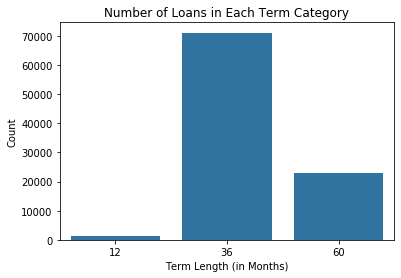

In [40]:
# Create a base color for the charts
base_color = sb.color_palette()[0]

# Create count plot for term categories
sb.countplot(data = df_clean, x = 'Term', color = base_color)
plt.xlabel('Term Length (in Months)')
plt.ylabel('Count')
plt.title('Number of Loans in Each Term Category');

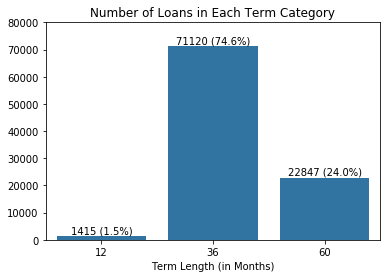

In [41]:
# Modify the count plot of each term to show the percentage of loans within each term
sb.countplot(data = df_clean, x = 'Term', color = base_color)
plt.xlabel('Term Length (in Months)')
plt.ylabel('')
plt.ylim(0, 80000)
plt.title('Number of Loans in Each Term Category')

# Retrieve locations and labels of xticks
locs, labels = plt.xticks()

# Total count and counts for each term
total_count = df_clean.shape[0]
term_counts = df_clean.Term.value_counts()

for loc, label in zip(locs, labels):
    # Number of loans per term as integer
    term_count = term_counts[int(label.get_text())]
    
    # Calculate the proportion of each term as percentage
    term_proportion = '{} ({:0.1f}%)'.format(term_count, 100*term_count/total_count)
    
    # Place proportion of the term on the top of the bars
    plt.text(x = loc, y = term_count + 1000, s = term_proportion, ha = 'center', color = 'black', fontsize = 10);

74.6% of the loans issued are 3 year loans, 24% are 5 year loans, and 1.5% are 1 year loans.  This leads me to wonder what type of loans are being awarded.  Next I will explore `ListingCategory` and the counts per category.

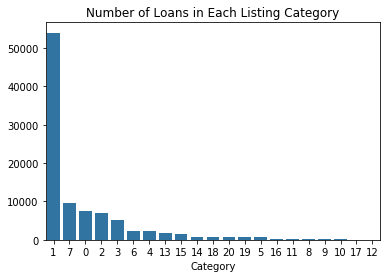

In [42]:
# Create a count plot for listing categories
category_order = df_clean['ListingCategory'].value_counts().index
sb.countplot(data = df_clean, x = 'ListingCategory', color = base_color, order = category_order)
plt.xlabel('Category')
plt.ylabel('')
plt.title('Number of Loans in Each Listing Category');

In [ ]:
# Modify the count plot to provide the name of each listing category and their proportions in a horizontal plot 
sb.countplot(data = df_clean, y = 'ListingCategory', color = base_color, order = category_order)
plt.xlabel('')
plt.ylabel('Listing Category')
plt.title('Number of Loans in Each Listing Category')

# Convert listing category codes to descriptions provide in data dictionary
locs = plt.yticks()[0]
category_dict = {0:'N/A', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan', 5:'Student Use'
              , 6:'Auto', 7:'Other', 8:'Baby, Adoption', 9:'Boat', 10:'Cosmetic Procedure', 11:'Engagement Ring'
              , 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases', 15:'Medical/Dental', 16:'Motorcycle'
              , 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'}
category_labels = [category_dict[category_num] for category_num in category_order]
plt.yticks(locs, category_labels);

# Show the number of loans for each category
category_counts = df_clean.ListingCategory.value_counts()

for loc, label in zip(locs, category_order):
    # Number of loan for the given category
    category_count = category_counts[label]
    
    # Calculate the proportion of each category as percentage
    category_prop = '{} ({:0.2f}%)'.format(category_count, 100*category_count/total_count)
    
    # Place proportion of each category at the right of each bar
    plt.text(y = loc, x = category_count + 1000, s = category_prop, va = 'center', color = 'black', fontsize = 10);

NameError: name 'sb' is not defined

### References
* https://github.com/jmlcode/p4-prosper-loan-data-visualization